In [2]:
import numpy as np
from scipy.sparse import random
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

In [3]:
def steepest_descent(A, b, x0, max_iter=1000, tol=1e-6):
    x = x0.copy()
    residuals = []
    gradients_norm = []
    
    for k in range(max_iter):
        r = b - A.dot(x)  # Residual
        residual_norm = np.linalg.norm(r)
        residuals.append(residual_norm)
        
        if residual_norm < tol:
            break
        
        # Compute gradient
        gradient = -A.T.dot(r)
        gradients_norm.append(np.linalg.norm(gradient))
        
        # Compute step size (alpha)
        alpha = np.dot(r, r) / np.dot(A.dot(r), r)
        
        # Update x
        x = x + alpha * r
        
    return x, residuals, gradients_norm

In [4]:
# Generate random sparse symmetric matrix A and vector b
n = 100  # Size of the matrix
density = 0.1  # Density of non-zero elements
A = random(n, n, density=density, format='csr')
A = A.T.dot(A)  # Make A symmetric
b = np.random.rand(n)

# Solve using built-in solver
x_true = spsolve(A, b)

# Initial guess for steepest descent
x0 = np.zeros(n)

# Run steepest descent algorithm
x_sd, residuals, gradients_norm = steepest_descent(A, b, x0)

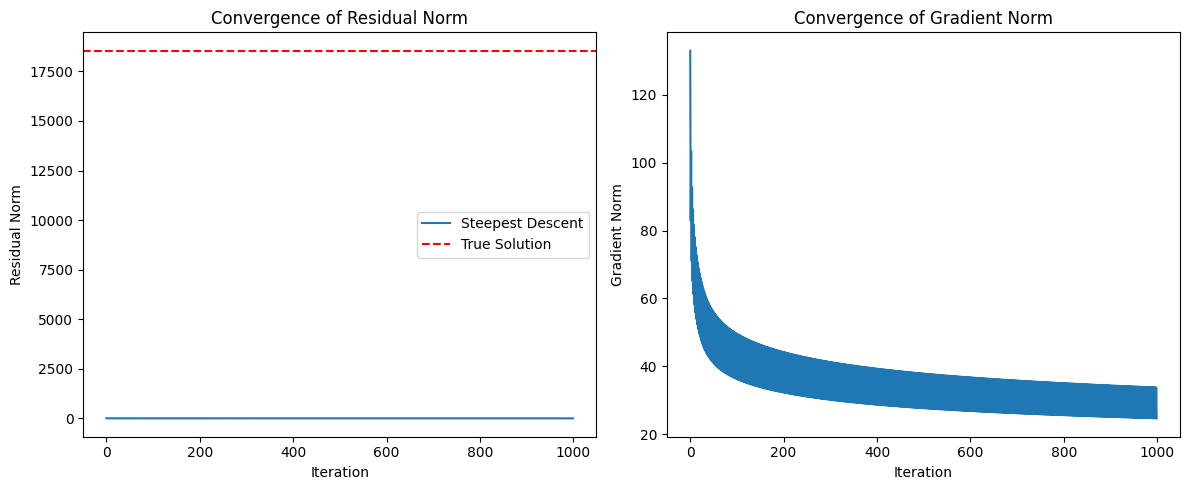

In [5]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(residuals, label='Steepest Descent')
plt.axhline(y=np.linalg.norm(x_true - x_sd), color='r', linestyle='--', label='True Solution')
plt.xlabel('Iteration')
plt.ylabel('Residual Norm')
plt.title('Convergence of Residual Norm')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gradients_norm)
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Convergence of Gradient Norm')

plt.tight_layout()
plt.show()
